In [1]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
data=pd.read_csv("1_boston_housing.csv")

In [6]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [8]:
x=data.drop('MEDV',axis=1)

In [9]:
y=data['MEDV']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [18]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128,input_shape = (13,),activation = 'relu',name='dense_1'))
model.add(Dense(64,activation = 'relu',name = 'dense_2'))
model.add(Dense(1,activation='linear',name='dense_output'))
          
model.compile(optimizer = 'adam',loss='mse',metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_output (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 535.4031 - mae: 21.6230 - val_loss: 488.5224 - val_mae: 20.2154
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 485.6736 - mae: 20.3105 - val_loss: 406.3703 - val_mae: 18.3455
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 389.2389 - mae: 17.9728 - val_loss: 306.3721 - val_mae: 15.8188
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 291.6563 - mae: 15.1907 - val_loss: 195.1851 - val_mae: 12.4911
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 173.8165 - mae: 11.3459 - val_loss: 102.0493 - val_mae: 8.9659
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.9274 - mae: 7.7985 - val_loss: 59.7665 - val_mae: 6.1451
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58.0560 - mae: 6.0622 - val_loss: 47.3085 - val_mae: 5.1134
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41.5359 - mae: 4.8624 - val_loss: 36.7013 - val_mae: 4.4990
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━

In [20]:
mse,mae=model.evaluate(x_test,y_test)
print("mse:",mse)
print("mae:",mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.6427 - mae: 2.6555 
mse: 9.659252166748047
mae: 2.5908827781677246


In [21]:
y_pred = model.predict(x_test[:])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [22]:
p=[]
for i in y_pred:
 p.append(list(i)[0])

In [23]:
d = pd.DataFrame({'actual':y_test,'predicted':p})
d

,actual,predicted
307,28.2,28.364754
343,23.9,22.542120
47,16.6,20.579309
67,22.0,24.320444
362,20.8,22.777617
...,...,...
92,22.9,24.218819
224,44.8,43.817661
110,21.7,20.069216
426,10.2,14.247795


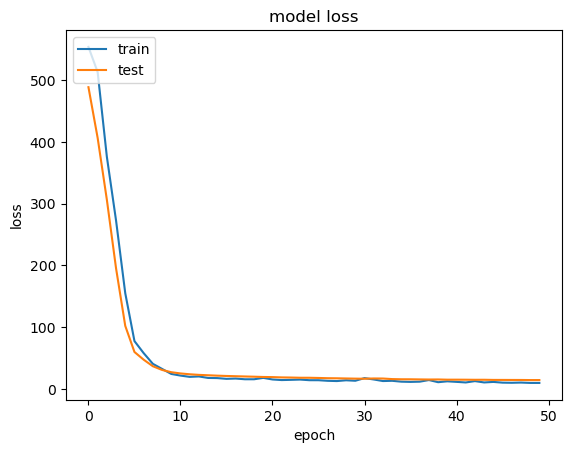

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()